거래량 chart 그리기   
pandas에 기본 내장된 datareader.data는 야후, 구글에서 증권데이터를 뽑아온다.   
그 데이터에는 시가, 종가, 고가, 저가 , 거래량 수정종가가 포함된다.   
참고로 야후에만 수정종가가 포함된다.   
* 수정종가 : 기업에 증자, 액면분할 등 이벤트가 발생할 때 주식 수와 함께 주가에 변화가 생기는데, 이때 현재 주가의 수준을 과거와 비교가능하게 하기 위해 과거 주가를 수정하는데 이를 수정종가라고 한다.   
즉, 각 기간의 마지막 거래일의 수정종가라는 것이다.   
여기에서 차트를 그릴때 Volume기준으로 했는데, 차후에 원하는 방향으로 바꾸면 된다.

In [10]:
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
start = datetime(2020,1,1)
end = datetime(2020,12,31)

In [13]:
def load_stock(code):
    stock=web.DataReader(code,'yahoo',start,end)
    ans=input('roll up chart를 원하십니까(y/n): ')
    if ans=='y':
        draw_rolling_chart(stock)
    else:
        draw_chart(stock)

In [14]:
def draw_chart(stock):
    stock['Volume'].plot(figsize=(10,8))

In [15]:
def draw_rolling_chart(stock):
    stock['Volume'].rolling(window=5).mean().plot(figsize=(10,8))

기업 코드를 입력해주세요.(6자리): 005930
roll up chart를 원하십니까(y/n): y


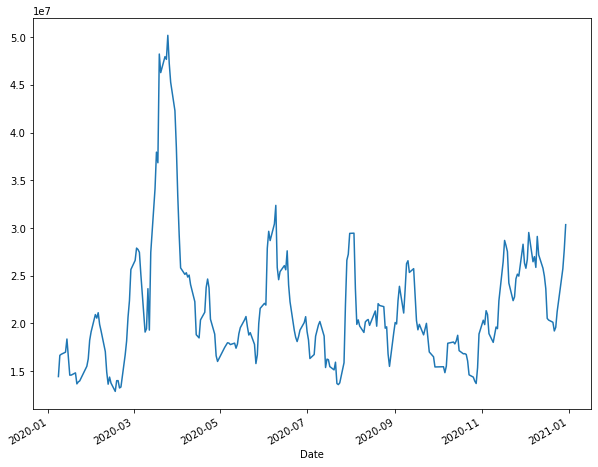

In [16]:
code_input=input("기업 코드를 입력해주세요.(6자리): ")
code=code_input+'.KS'
load_stock(code)